<a href="https://colab.research.google.com/github/kesemev/Azure/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [26]:
import pandas as pd
import numpy as np
from pathlib import Path
import re
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
from lightgbm import LGBMClassifier
SYS_INPUT_PATH = Path('../input')

## Modeling

In [27]:
df = pd.read_csv('/content/proc_data_final.csv')
df

,Pclass,Sex,Age,SibSp,num_family,deck,title,len_name,1,5,Survived
0,3,0,22.0,1,1,9,0,23,-6.825372,-0.290887,0
1,1,1,38.0,1,1,3,2,51,8.445798,-0.555149,1
2,3,1,26.0,0,0,9,1,22,-2.863258,0.103216,1
3,1,1,35.0,1,1,3,2,44,5.763054,-1.157636,1
4,3,0,35.0,0,0,9,0,24,6.221177,1.039760,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,9,6,21,-2.015150,0.117256,0
887,1,1,19.0,0,0,2,1,28,-9.932201,-1.317746,1
888,3,1,28.0,1,3,9,1,40,-0.865384,-1.132802,0
889,1,0,26.0,0,0,3,0,21,-3.210774,-1.295624,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1), df['Survived'], test_size=0.33, random_state=42)

## rf

In [29]:
model = RandomForestClassifier(random_state = 1)
model.fit(X_train, y_train)
metrics.accuracy_score(y_test, model.predict(X_test))

0.8101694915254237

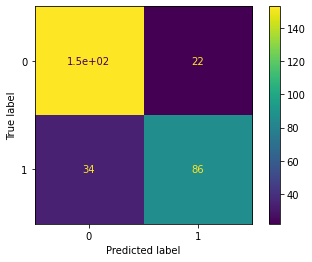

In [30]:
plot_confusion_matrix(model, X_test, y_test)

In [31]:
np.mean(cross_val_score(model, df.drop('Survived', axis = 1), df['Survived'], cv=10))

0.8058676654182271

In [32]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 3000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [33]:
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 511, 822, 1133, 1444, 1755, 2066, 2377, 2688, 3000]}

In [34]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_estimator_

In [ ]:
metrics.accuracy_score(y_test, rf_random.best_estimator_.predict(X_test))

## lgb

In [35]:
model = LGBMClassifier(random_state = 1)
model.fit(X_train, y_train)
metrics.accuracy_score(y_test, model.predict(X_test))

0.8

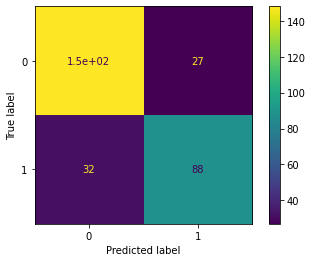

In [36]:
plot_confusion_matrix(model, X_test, y_test)

In [37]:
np.mean(cross_val_score(model, df.drop('Survived', axis = 1), df['Survived'], cv=10))

0.7991885143570536

In [38]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 3000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [39]:
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 511, 822, 1133, 1444, 1755, 2066, 2377, 2688, 3000]}

In [22]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  8.0min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=1, reg_alpha=0.0,
                                            reg_lambda=0.0, silent...
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10,

In [23]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [24]:
rf_random.best_estimator_

LGBMClassifier(boosting_type='gbdt', bootstrap=True, class_weight=None,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=10, max_features='auto', min_child_samples=20,
               min_child_weight=0.001, min_samples_leaf=4, min_samples_split=5,
               min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=31,
               objective=None, random_state=1, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [25]:
metrics.accuracy_score(y_test, rf_random.best_estimator_.predict(X_test))

0.8